In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/fruit-and-vegetable-image-recognition'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/fruit-and-vegetable-image-recognition/train/apple/Image_21.jpg
/content/drive/MyDrive/fruit-and-vegetable-image-recognition/train/apple/Image_40.jpg
/content/drive/MyDrive/fruit-and-vegetable-image-recognition/train/apple/Image_10.jpg
/content/drive/MyDrive/fruit-and-vegetable-image-recognition/train/apple/Image_38.jpg
/content/drive/MyDrive/fruit-and-vegetable-image-recognition/train/apple/Image_17.jpg
/content/drive/MyDrive/fruit-and-vegetable-image-recognition/train/apple/Image_19.jpg
/content/drive/MyDrive/fruit-and-vegetable-image-recognition/train/apple/Image_24.jpg
/content/drive/MyDrive/fruit-and-vegetable-image-recognition/train/apple/Image_1.jpg
/content/drive/MyDrive/fruit-and-vegetable-image-recognition/train/apple/Image_32.jpg
/content/drive/MyDrive/fruit-and-vegetable-image-recognition/train/apple/Image_20.jpg
/content/drive/MyDrive/fruit-and-vegetable-image-recognition/train/apple/Image_3.jpg
/content/drive/MyDrive/fruit-and-vegetable-image-recogni

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.15.0


In [5]:
# Create a list with the filepaths for training and testing
train_dir = Path('/content/drive/MyDrive/fruit-and-vegetable-image-recognition/train')
train_filepaths = list(train_dir.glob(r'*/*.jpg'))

In [6]:
test_dir = Path('/content/drive/MyDrive/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'*/*.jpg'))

In [7]:
val_dir = Path('/content/drive/MyDrive/fruit-and-vegetable-image-recognition/validation')
val_filepaths = list(val_dir.glob(r'*/*.jpg'))


In [8]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

In [9]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [10]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2746

Number of different labels: 36

Labels: ['capsicum' 'pear' 'cabbage' 'potato' 'sweetpotato' 'chilli pepper'
 'ginger' 'tomato' 'garlic' 'turnip' 'orange' 'watermelon' 'eggplant'
 'paprika' 'jalepeno' 'peas' 'corn' 'sweetcorn' 'lettuce' 'onion' 'banana'
 'cucumber' 'beetroot' 'cauliflower' 'carrot' 'kiwi' 'spinach' 'raddish'
 'pineapple' 'lemon' 'soy beans' 'grapes' 'bell pepper' 'apple'
 'pomegranate' 'mango']


In [11]:
train_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/fruit-and-vegetable-ima...,capsicum
1,/content/drive/MyDrive/fruit-and-vegetable-ima...,pear
2,/content/drive/MyDrive/fruit-and-vegetable-ima...,cabbage
3,/content/drive/MyDrive/fruit-and-vegetable-ima...,potato
4,/content/drive/MyDrive/fruit-and-vegetable-ima...,sweetpotato


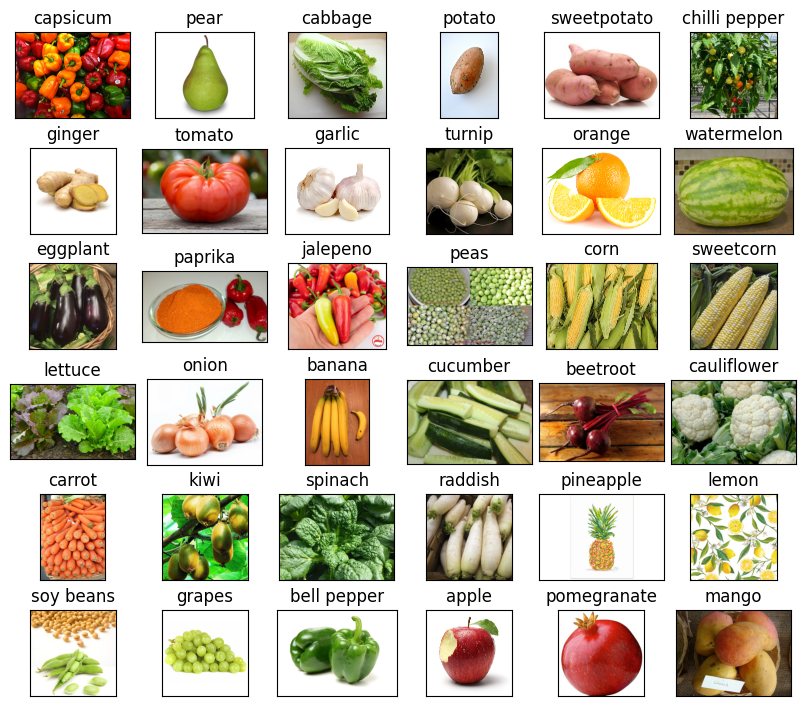

In [12]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [54]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [14]:
# Check the column names in your DataFrame
print(train_df.columns)


Index(['Filepath', 'Label'], dtype='object')


In [55]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2746 validated image filenames belonging to 36 classes.


In [58]:
val_images = test_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 393 validated image filenames belonging to 36 classes.


In [17]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 393 validated image filenames belonging to 36 classes.


In [18]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [19]:
 inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
86/86 [==============================] - 615s 7s/step - loss: 1.8705 - accuracy: 0.5222 - val_loss: 0.5077 - val_accuracy: 0.8626
Epoch 2/5
86/86 [==============================] - 85s 992ms/step - loss: 0.5642 - accuracy: 0.8259 - val_loss: 0.2775 - val_accuracy: 0.9186
Epoch 3/5
86/86 [==============================] - 82s 960ms/step - loss: 0.3349 - accuracy: 0.8922 - val_loss: 0.2140 - val_accuracy: 0.9389
Epoch 4/5
86/86 [==============================] - 82s 954ms/step - loss: 0.2251 - accuracy: 0.9268 - val_loss: 0.1956 - val_accuracy: 0.9491
Epoch 5/5
86/86 [==============================] - 82s 958ms/step - loss: 0.1435 - accuracy: 0.9563 - val_loss: 0.1625 - val_accuracy: 0.9517


In [44]:
# prompt: calculat accuracy of this model

history.history['accuracy'][-1]


0.9563000798225403

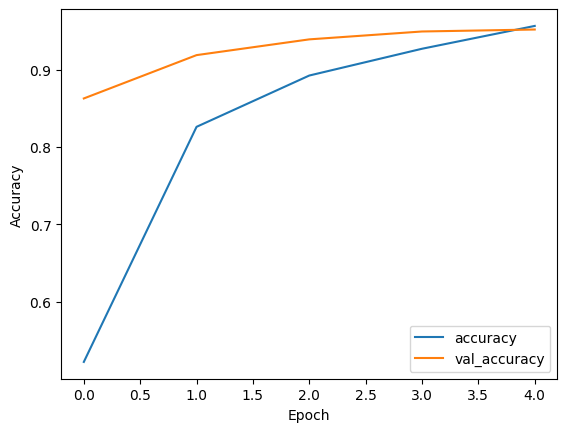

In [28]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/5
86/86 [==============================] - 88s 1s/step - loss: 0.1080 - accuracy: 0.9669 - val_loss: 0.1415 - val_accuracy: 0.9567
Epoch 2/5
86/86 [==============================] - 85s 991ms/step - loss: 0.0935 - accuracy: 0.9705 - val_loss: 0.1526 - val_accuracy: 0.9593
Epoch 3/5
86/86 [==============================] - 83s 969ms/step - loss: 0.0573 - accuracy: 0.9851 - val_loss: 0.1410 - val_accuracy: 0.9593
Epoch 4/5
86/86 [==============================] - 85s 988ms/step - loss: 0.0539 - accuracy: 0.9814 - val_loss: 0.1420 - val_accuracy: 0.9720
Epoch 5/5
86/86 [==============================] - 83s 968ms/step - loss: 0.0476 - accuracy: 0.9858 - val_loss: 0.1520 - val_accuracy: 0.9669


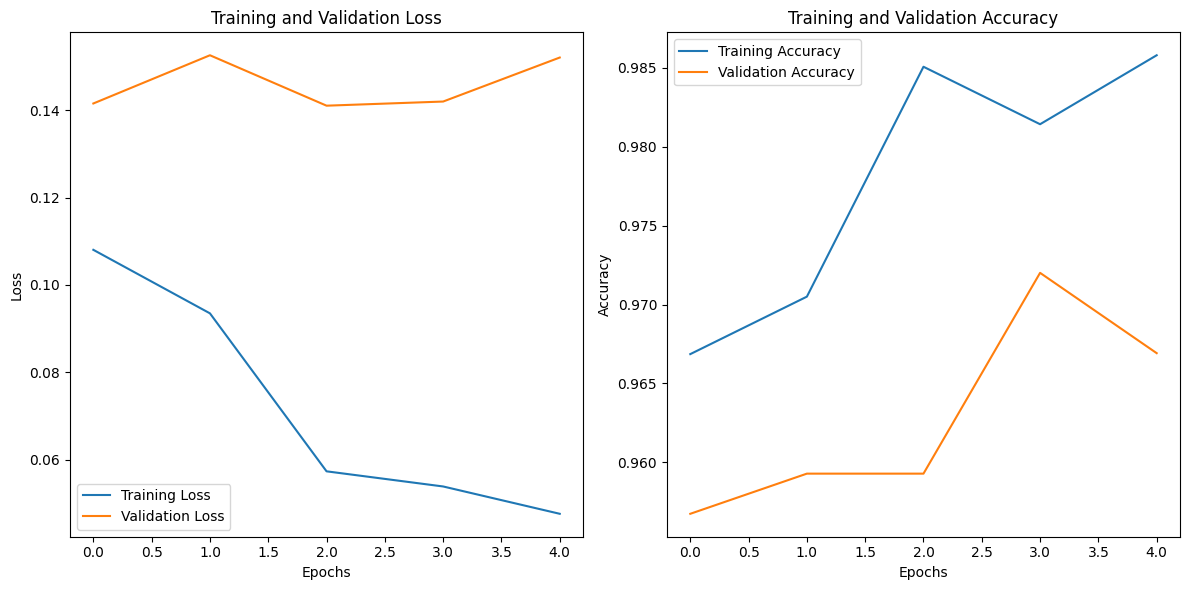

In [52]:
import matplotlib.pyplot as plt

# Assuming 'model', 'train_images', and 'val_images' are defined
history = model.fit(train_images, validation_data=val_images, batch_size=32, epochs=5)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [39]:
# This assumes that your generator has the class labels encoded as integers
true_labels = test_images.classes

# Predict labels using the trained model
predicted_probs = model.predict(test_images)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Decode integer labels to class names
true_class_names = [test_images.class_indices.get(class_label, f'Unknown-{class_label}') for class_label in true_labels]
predicted_class_names = [test_images.class_indices.get(class_label, f'Unknown-{class_label}') for class_label in predicted_labels]


13/13 [==============================] - 12s 902ms/step


In [20]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

13/13 [==============================] - 13s 885ms/step


['capsicum',
 'soy beans',
 'cabbage',
 'banana',
 'apple',
 'eggplant',
 'soy beans',
 'beetroot',
 'watermelon',
 'apple',
 'raddish',
 'watermelon',
 'cauliflower',
 'kiwi',
 'sweetcorn',
 'paprika',
 'garlic',
 'watermelon',
 'pear',
 'lemon',
 'bell pepper',
 'soy beans',
 'jalepeno',
 'watermelon',
 'apple',
 'carrot',
 'pomegranate',
 'potato',
 'cucumber',
 'kiwi',
 'soy beans',
 'garlic',
 'bell pepper',
 'tomato',
 'watermelon',
 'watermelon',
 'tomato',
 'tomato',
 'lemon',
 'watermelon',
 'capsicum',
 'bell pepper',
 'cabbage',
 'watermelon',
 'mango',
 'pear',
 'pineapple',
 'lemon',
 'eggplant',
 'watermelon',
 'grapes',
 'bell pepper',
 'grapes',
 'pineapple',
 'lettuce',
 'eggplant',
 'peas',
 'watermelon',
 'bell pepper',
 'lemon',
 'watermelon',
 'pomegranate',
 'raddish',
 'watermelon',
 'raddish',
 'eggplant',
 'paprika',
 'watermelon',
 'watermelon',
 'watermelon',
 'cauliflower',
 'ginger',
 'pineapple',
 'sweetpotato',
 'tomato',
 'ginger',
 'cucumber',
 'sweetco

In [21]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [59]:
import sklearn.metrics

# Assuming 'true_class_names' and 'predicted_class_names' are defined
print(sklearn.metrics.classification_report(true_class_names, predicted_class_names))


              precision    recall  f1-score   support

   Unknown-0       1.00      0.67      0.80         9
   Unknown-1       1.00      0.78      0.88         9
  Unknown-10       1.00      1.00      1.00        10
  Unknown-11       1.00      1.00      1.00        10
  Unknown-12       1.00      1.00      1.00        10
  Unknown-13       0.91      1.00      0.95        10
  Unknown-14       1.00      1.00      1.00         8
  Unknown-15       1.00      1.00      1.00         9
  Unknown-16       1.00      1.00      1.00        10
  Unknown-17       1.00      1.00      1.00         7
  Unknown-18       1.00      1.00      1.00         9
  Unknown-19       1.00      1.00      1.00        10
   Unknown-2       1.00      1.00      1.00        10
  Unknown-20       1.00      1.00      1.00         9
  Unknown-21       1.00      1.00      1.00         4
  Unknown-22       0.91      1.00      0.95        10
  Unknown-23       1.00      1.00      1.00        10
  Unknown-24       1.00    

In [22]:
img = output('/content/drive/MyDrive/fruit-and-vegetable-image-recognition/train/watermelon/Image_84.jpg')
img

1/1 [==============================] - 2s 2s/step


'watermelon'

In [25]:
model.save('FV.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
